In [ ]:
import numpy as np
import pandas as pd
import csv
import pickle
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,accuracy_score
import seaborn as sns
from keras.utils import np_utils
from keras.layers import LSTM, BatchNormalization
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enable gpu
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

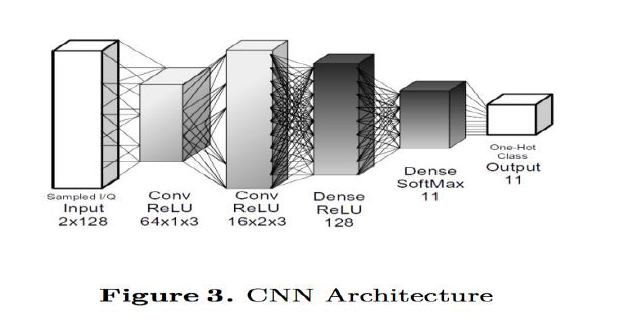

In [ ]:
def split_tuple(labels):
  label, snr = map(list, zip(*(x.split('_') for x in labels)))
  label,snr=np.array(label),np.array(snr)
  return label,snr

In [ ]:
def create_model():
  number_of_channels = 2
  cnn_model = Sequential()
  
  cnn_model.add(Conv2D(64, (1,3),padding='same',input_shape=(128, number_of_channels,1), activation='relu'))

  cnn_model.add(Conv2D(16, (2,3),padding='same',activation='relu'))

  cnn_model.add(BatchNormalization())
  
  cnn_model.add(Flatten())
  cnn_model.add(Dropout(0.5))

  cnn_model.add(Dense(128, activation ='relu'))

  cnn_model.add(Dense(10, activation ='softmax'))

  

  return cnn_model

In [ ]:
samples = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/drev_raw.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/labels.npy')
gc.collect()

19

In [ ]:
# to encode the labels
lb = LabelEncoder()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(samples, labels,test_size=0.3, random_state=1 ,stratify=labels)
del samples
del labels
gc.collect()
# take 5% of training set for validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=1,stratify=y_train)

y_train,snr_train = split_tuple(y_train)
y_test,snr_test = split_tuple(y_test)
y_val,snr_val=split_tuple(y_val)

# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))
del y_train
del y_val
gc.collect()

0

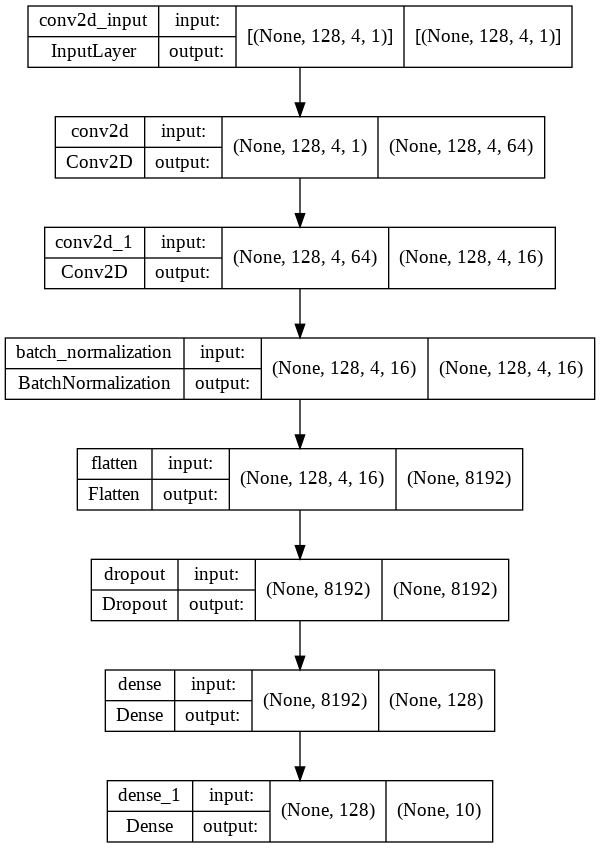

In [ ]:
# create model
model = create_model()
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

# Save an image of the model's architecture to a file
plot_model(model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

Learning rate: 0.1
Epoch 1/100
24938/24938 [==============================] - 129s 5ms/step - loss: 2.3978 - accuracy: 0.0996 - val_loss: 2.3103 - val_accuracy: 0.1000
Epoch 2/100
24938/24938 [==============================] - 107s 4ms/step - loss: 2.3154 - accuracy: 0.0994 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 3/100
24938/24938 [==============================] - 109s 4ms/step - loss: 2.3152 - accuracy: 0.1000 - val_loss: 2.3403 - val_accuracy: 0.1000
Epoch 4/100
24938/24938 [==============================] - 107s 4ms/step - loss: 2.3156 - accuracy: 0.0994 - val_loss: 2.3129 - val_accuracy: 0.1000
Epoch 5/100
24938/24938 [==============================] - 108s 4ms/step - loss: 2.3152 - accuracy: 0.1006 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 6/100
24938/24938 [==============================] - 108s 4ms/step - loss: 2.3153 - accuracy: 0.1001 - val_loss: 2.3083 - val_accuracy: 0.1000


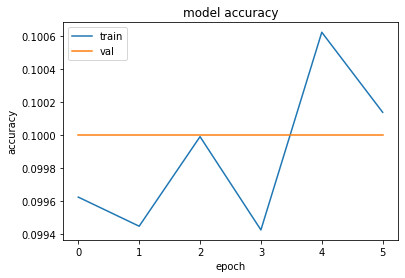

**************************************************


Learning rate: 0.01
Epoch 1/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.3000 - accuracy: 0.1012 - val_loss: 2.3055 - val_accuracy: 0.1000
Epoch 2/100
24938/24938 [==============================] - 106s 4ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 3/100
24938/24938 [==============================] - 106s 4ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 5/100
24938/24938 [==============================] - 106s 4ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 6/100
24938/24938 [==============================] - 109s 4ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3043 - val_accuracy: 0.1000


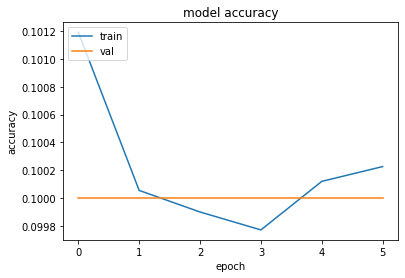

**************************************************


Learning rate: 0.001
Epoch 1/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.6939 - accuracy: 0.3297 - val_loss: 2.1608 - val_accuracy: 0.2762
Epoch 2/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.6226 - accuracy: 0.3545 - val_loss: 2.9973 - val_accuracy: 0.1864
Epoch 3/100
24938/24938 [==============================] - 107s 4ms/step - loss: 1.5981 - accuracy: 0.3634 - val_loss: 2.7128 - val_accuracy: 0.2191
Epoch 4/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.5846 - accuracy: 0.3695 - val_loss: 2.1291 - val_accuracy: 0.2708
Epoch 5/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.5745 - accuracy: 0.3736 - val_loss: 2.1925 - val_accuracy: 0.2571
Epoch 6/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.5650 - accuracy: 0.3768 - val_loss: 1.6983 - val_accuracy: 0.3352
Epoch 7/100
24938/24938 [=======

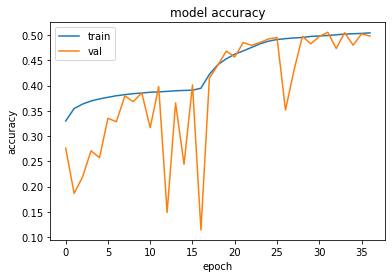

**************************************************


Learning rate: 0.0001
Epoch 1/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.5183 - accuracy: 0.3880 - val_loss: 1.4344 - val_accuracy: 0.4140
Epoch 2/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.2242 - accuracy: 0.4868 - val_loss: 1.1890 - val_accuracy: 0.5022
Epoch 3/100
24938/24938 [==============================] - 106s 4ms/step - loss: 1.1726 - accuracy: 0.5045 - val_loss: 4.4337 - val_accuracy: 0.2579
Epoch 4/100
24938/24938 [==============================] - 107s 4ms/step - loss: 1.1464 - accuracy: 0.5147 - val_loss: 1.3131 - val_accuracy: 0.4855
Epoch 5/100
24938/24938 [==============================] - 106s 4ms/step - loss: 1.1255 - accuracy: 0.5239 - val_loss: 2.2328 - val_accuracy: 0.4047
Epoch 6/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.1051 - accuracy: 0.5332 - val_loss: 1.4215 - val_accuracy: 0.4615
Epoch 7/100
24938/24938 [======

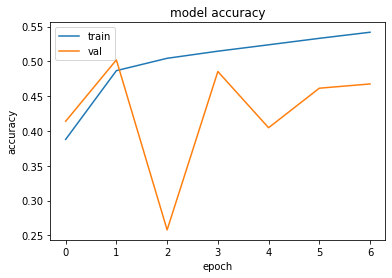

**************************************************


Learning rate: 1e-05
Epoch 1/100
24938/24938 [==============================] - 107s 4ms/step - loss: 1.9457 - accuracy: 0.2489 - val_loss: 1.7528 - val_accuracy: 0.3086
Epoch 2/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.7113 - accuracy: 0.3193 - val_loss: 1.6217 - val_accuracy: 0.3543
Epoch 3/100
24938/24938 [==============================] - 106s 4ms/step - loss: 1.6145 - accuracy: 0.3589 - val_loss: 1.5398 - val_accuracy: 0.4022
Epoch 4/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.5385 - accuracy: 0.3896 - val_loss: 1.4569 - val_accuracy: 0.4309
Epoch 5/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.4694 - accuracy: 0.4147 - val_loss: 1.3915 - val_accuracy: 0.4500
Epoch 6/100
24938/24938 [==============================] - 106s 4ms/step - loss: 1.4088 - accuracy: 0.4355 - val_loss: 1.3503 - val_accuracy: 0.4556
Epoch 7/100
24938/24938 [=======

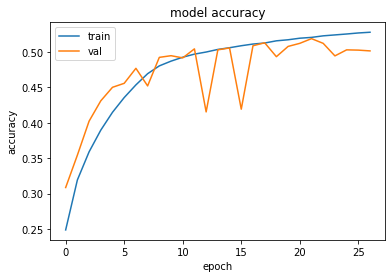

**************************************************


Learning rate: 1e-06
Epoch 1/100
24938/24938 [==============================] - 112s 4ms/step - loss: 2.1757 - accuracy: 0.1622 - val_loss: 2.1207 - val_accuracy: 0.1801
Epoch 2/100
24938/24938 [==============================] - 112s 5ms/step - loss: 2.1046 - accuracy: 0.1914 - val_loss: 2.0845 - val_accuracy: 0.2116
Epoch 3/100
24938/24938 [==============================] - 112s 4ms/step - loss: 2.0649 - accuracy: 0.2161 - val_loss: 2.0380 - val_accuracy: 0.2316
Epoch 4/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.0184 - accuracy: 0.2329 - val_loss: 1.9867 - val_accuracy: 0.2479
Epoch 5/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.9706 - accuracy: 0.2477 - val_loss: 1.9360 - val_accuracy: 0.2639
Epoch 6/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.9268 - accuracy: 0.2613 - val_loss: 1.8907 - val_accuracy: 0.2729
Epoch 7/100
24938/24938 [=======

In [ ]:
#tuning on different learning rates
gc.collect()
rates = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
epochs = 100
path = '/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/'
checkpoint_filepath = path+'trial_checkpoint_dervative_cnn'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
for lr in rates:
  print("Learning rate:",lr)
  model = create_model()
  callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
  opt = tensorflow.keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

  # train model
  cnn_results = model.fit(x_train, y_train_lb,
                  epochs = epochs,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb),callbacks=[callback,model_checkpoint_callback])
  # Plot model accuracy over ephocs
  plt.plot(cnn_results.history['accuracy'])
  plt.plot(cnn_results.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(path+'trial_devative_cnn'+f'lr_{str(lr)}.png')
  plt.show()
  print("**************************************************\n\n")
  del model
  gc.collect()


Epoch 1/50
24938/24938 [==============================] - 127s 5ms/step - loss: 1.9433 - accuracy: 0.2506 - val_loss: 1.7395 - val_accuracy: 0.3084
Epoch 2/50
24938/24938 [==============================] - 110s 4ms/step - loss: 1.6860 - accuracy: 0.3250 - val_loss: 1.5988 - val_accuracy: 0.3651
Epoch 3/50
24938/24938 [==============================] - 108s 4ms/step - loss: 1.5971 - accuracy: 0.3605 - val_loss: 1.5365 - val_accuracy: 0.3956
Epoch 4/50
24938/24938 [==============================] - 107s 4ms/step - loss: 1.5448 - accuracy: 0.3831 - val_loss: 1.4879 - val_accuracy: 0.4035
Epoch 5/50
24938/24938 [==============================] - 107s 4ms/step - loss: 1.4995 - accuracy: 0.4010 - val_loss: 1.4324 - val_accuracy: 0.4387
Epoch 6/50
24938/24938 [==============================] - 110s 4ms/step - loss: 1.4521 - accuracy: 0.4198 - val_loss: 1.3845 - val_accuracy: 0.4507
Epoch 7/50
24938/24938 [==============================] - 109s 4ms/step - loss: 1.4065 - accuracy: 0.4373 - val_

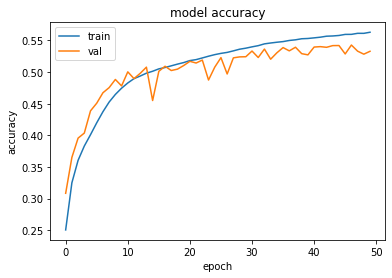

3482

In [ ]:
#training on best learning rate which is 1e-5
gc.collect()
model = create_model()
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 50,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
# train accuracy
score = model.evaluate(x_train, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

Training Accuracy:  0.09997870028018951


In [ ]:
# evaluate test set
# encode labels
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/dervative_model.h5')

y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

score = model.evaluate(x_test, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.5314611196517944


In [ ]:
# to get confusion matrix
y_test_classes = y_test_lb.argmax(1)
y_predicted = model.predict(x_test)
y_pred_classes = np.argmax(y_predicted,axis=1)


In [ ]:

del x_val
del y_train_lb
del y_val_lb
gc.collect()

1359

In [ ]:
# get confusion matrix
classes = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/classes.npy')
confusion_matrix1 = confusion_matrix(y_true= y_test_classes, y_pred=y_pred_classes)
classes = np.array([x[0] for x in classes])
classes=np.unique(classes)
print(classes)
#Add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, columns=list(classes), index=list(classes))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix1

[b'8PSK' b'AM-DSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16' b'QAM64'
 b'QPSK' b'WBFM']
The rows represents the true values or observations
The columns respresent the model's predictions


,b'8PSK',b'AM-DSB',b'BPSK',b'CPFSK',b'GFSK',b'PAM4',b'QAM16',b'QAM64',b'QPSK',b'WBFM'
b'8PSK',18287,1388,2837,2443,1980,362,657,427,7030,589
b'AM-DSB',1274,25150,1510,975,1288,192,45,5,1310,4251
b'BPSK',2422,1292,23984,1697,1782,1462,167,44,2563,587
b'CPFSK',2499,1338,2461,23256,2461,340,266,111,2577,691
b'GFSK',1763,1713,2039,1735,24739,254,90,26,1832,1809
b'PAM4',1775,981,4986,1252,1398,23070,135,41,1899,463
b'QAM16',5601,796,1780,1549,1424,334,10410,9975,3706,425
b'QAM64',4637,523,1172,1127,1064,269,10945,13123,2853,287
b'QPSK',7867,1303,2800,2212,2033,375,647,421,17739,603
b'WBFM',1312,16755,1564,1057,2123,178,56,9,1378,11568


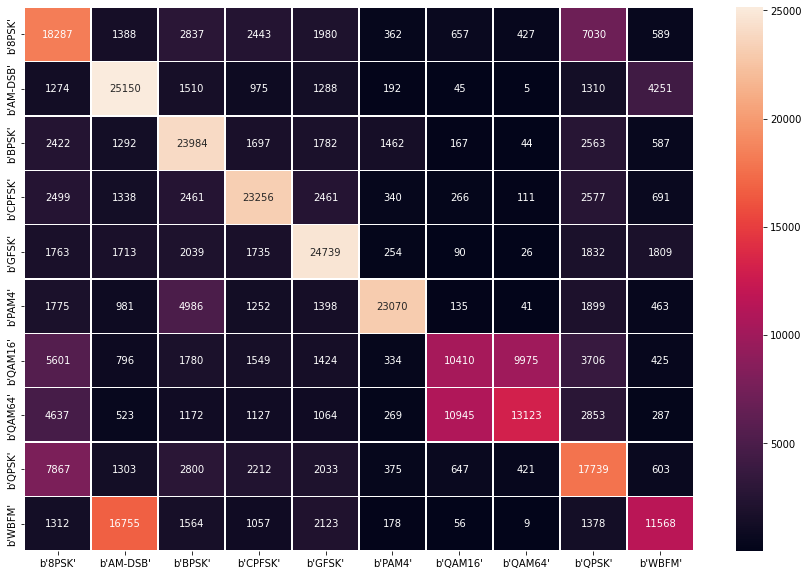

In [ ]:
# get most confusing classes
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(confusion_matrix1, annot=True, linewidths=.5, ax=ax, fmt='g')

In [ ]:
# Print f1, precision, and recall scores
print("Percision: ",precision_score(y_test_classes, y_pred_classes , average="macro"))
print("Recall: ",recall_score(y_test_classes, y_pred_classes , average="macro"))
print("F-score: ",f1_score(y_test_classes, y_pred_classes , average="macro"))

Percision:  0.5449455049569323
Recall:  0.5314611111111112
F-score:  0.5263691678808214


In [ ]:
# group by snr
snr_test = [int(snr) for snr in snr_test]

sorted_snrs = np.sort(np.unique(snr_test))
x = []
y = []
for snr in sorted_snrs:
  idx = np.where(snr_test == snr)
  x.append(snr)
  y.append(accuracy_score(np.argmax(y_test_lb[idx], axis = 1), np.argmax(y_predicted[idx], axis = 1)))


In [ ]:
# print results of snr
pd.DataFrame(data = np.array(y).reshape(1, -1) * 100,  columns = sorted_snrs, index = ['accuracy']).round(2)

,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18
accuracy,10.29,10.87,11.66,13.34,17.07,24.34,32.17,41.32,56.44,66.63,73.52,77.12,77.81,78.52,77.88,78.87,78.7,78.92,78.48,78.98


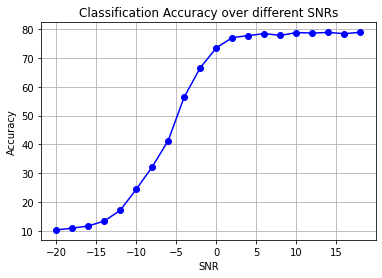

In [ ]:
# plot accuracy vs snr
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy over different SNRs')
plt.plot(x, np.array(y) * 100, 'bo-')
plt.grid(True)